In [1]:
%autosave 60
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import pickle

Autosaving every 60 seconds
Automatically created module for IPython interactive environment


In [2]:
DATA_DIR = "C:/Wasif/PD Motor Feature Extraction/TASK2_FEATURES_04_21/"
X_file = "x_repeat_removed_raw_pixels.npy"
y_file = "y_repeat_removed_raw_pixels.npy"
X_index_file = "index_repeat_removed.pickle"

In [3]:
def load_dataset(DATA_DIR):
    X = np.load(DATA_DIR+X_file)
    #For now, only considering the frequency features
    X = X[:,65536:]
    
    #Scale features
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X_scaled = scaler.transform(X)
    
    X_scaled = X
    
    y = np.load(DATA_DIR+y_file)
    
    with open(DATA_DIR+X_index_file, 'rb') as handle:
        X_index = pickle.load(handle)  
    
    return (X_scaled, y, X_index)

In [4]:
def SMOTE_oversample(X,y):
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    return (X,y)

In [5]:
def dataset_property(X, y):
    positives = np.sum(y==1.0)
    negatives = np.sum(y==0.0)
    print(positives, negatives)
    return

Dataset Loaded
295 492
Fitting 100 folds for each of 3 candidates, totalling 300 fits
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.0s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.2s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.2s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END .............................................C=1000; total time=   0.1s
[CV] END ..............

[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ..............................................C=100; total time=   0.0s
[CV] END ...................

[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...................

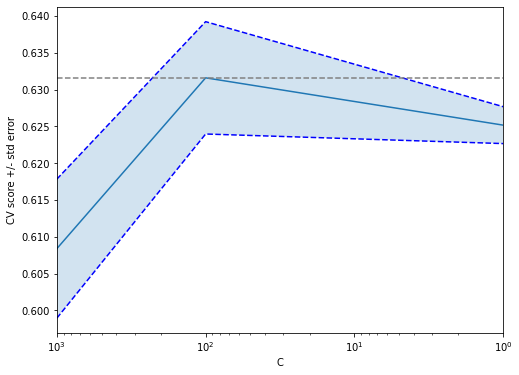

In [6]:
(X, y, X_index) = load_dataset(DATA_DIR)
assert(X.shape[0]==y.shape[0] and y.shape[0]==len(X_index))
print("Dataset Loaded")

#Subset of data for faster development
#X = X[:150]
#y = y[:150]

dataset_property(X,y)

#(X,y) = SMOTE_oversample(X,y)
#dataset_property(X,y)

#make_pipeline(StandardScaler(), SVC(gamma='auto'))
#model = Lasso(random_state=0, max_iter=100000)
model = sklearn.svm.SVC()
#alphas = np.logspace(-4, -0.5, 30)
#alphas = np.logspace(-4, -0.5, 10)
C = [1000, 100, 1]

tuned_parameters = [{'C': C}]
n_folds = 100

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=True, verbose=2)
clf.fit(X, y)

print(clf.cv_results_)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(C, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(C, scores + std_error, 'b--')
plt.semilogx(C, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('C')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([C[0], C[-1]])
plt.show()

In [8]:
performance = {}
performance["TP"] = np.sum(y[clf.predict(X)==1]==1)
performance["TN"] = np.sum(y[clf.predict(X)==0]==0)
performance["FP"] = np.sum(y[clf.predict(X)==1]==0)
performance["FN"] = np.sum(y[clf.predict(X)==0]==1)

performance["precision"] = performance["TP"]/(performance["TP"]+performance["FP"])
performance['recall'] = performance["TP"]/(performance["TP"]+performance["FN"])
performance["f1"] = (2.0*performance["precision"]*performance["recall"])/(performance["precision"]+performance["recall"])

performance["accuracy"] = (performance["TP"]+performance["TN"])/(performance["TP"]+performance["TN"]+performance["FP"]+performance["FN"])

print(performance)

{'TP': 29, 'TN': 487, 'FP': 5, 'FN': 266, 'precision': 0.8529411764705882, 'recall': 0.09830508474576272, 'f1': 0.1762917933130699, 'accuracy': 0.6556543837357052}
